# Lendo o dataset do CinC2023

Obs. Não usei o dataset inteiro, por limitações no pc. Mas o código é válido caso use o dataset completo

DATASET: https://physionet.org/content/i-care/1.0/

In [1]:
# Importar bibliotecas
import glob
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\estel\AppData\Local\Temp\ipykernel_9516\2130821300.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\estel\anaconda3\envs\estudos\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = r'C:/Users/estel/Documents/Python_Codes/datasets/i-care-international-cardiac-arrest-research-consortium-database-1.0/training/'
PATIENT_PATTERN = dir + "/*/*.txt"

In [3]:
patient_files = glob.glob(PATIENT_PATTERN)
patient_metadata = []
record_quality = []

for patient_file in tqdm(patient_files):
    
    patient_metadata.extend(
        pd.read_csv(patient_file, delimiter=": ", header=None, index_col=0, engine='python').T.to_dict(orient='records')
    )
    record_quality.append(
        np.array(pd.read_csv(patient_file[:-3] + "tsv", delimiter='\t', engine='python').Quality)
    )

100%|██████████| 362/362 [00:12<00:00, 28.90it/s]


In [14]:
patient_file

'C:/Users/estel/Documents/Python_Codes/datasets/i-care-international-cardiac-arrest-research-consortium-database-1.0/training\\ICARE_0738\\ICARE_0738.txt'

In [4]:
valid_hours = np.sum(~np.isnan(np.vstack(record_quality)), axis=1)
mean_quality = np.nanmean(np.vstack(record_quality), axis=1)

In [5]:
df_patient = pd.DataFrame(patient_metadata)
df_quality = pd.DataFrame(np.vstack(record_quality), columns=[f"h{i:02}" for i in range(72)])

In [6]:
df_patient["Age"] = df_patient["Age"].astype(float)
df_patient["ROSC"] = df_patient["ROSC"].astype(float)
df_patient["OHCA"] = df_patient["OHCA"].astype(bool)
df_patient["VFib"] = df_patient["VFib"].astype(bool)
df_patient["TTM"] = df_patient["TTM"].astype(float)
df_patient['Poor_out'] = df_patient["Outcome"] == 'Poor'
df_patient['male'] = df_patient["Sex"] == 'Male'
df_patient['female'] = df_patient["Sex"] == 'Female'
df_patient['pindex'] = df_patient["Patient"].str.replace("ICARE_", "")
df_patient['CPC'] = df_patient['CPC'].astype(int)
df_patient["Sex"].fillna("Other", inplace=True)
df_patient["Sex"] = df_patient["Sex"].astype(str)

C:\Users\estel\AppData\Local\Temp\ipykernel_9516\3801531115.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_patient["Sex"].fillna("Other", inplace=True)


In [7]:
df = pd.concat([df_patient, df_quality], axis=1)

In [13]:
df

,Patient,Age,Sex,ROSC,OHCA,VFib,TTM,Outcome,CPC,Poor_out,...,h62,h63,h64,h65,h66,h67,h68,h69,h70,h71
0,ICARE_0284,53.0,Male,NaN,True,True,33.0,Good,1,False,...,1.000,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1.000,1.0
1,ICARE_0286,85.0,Female,7.0,True,True,NaN,Good,1,False,...,1.000,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1.000,1.0
2,ICARE_0296,48.0,Male,NaN,True,True,36.0,Good,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICARE_0299,45.0,Male,NaN,True,True,33.0,Good,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICARE_0303,51.0,Male,24.0,True,True,33.0,Good,1,False,...,1.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,ICARE_0732,81.0,Female,15.0,True,True,33.0,Poor,5,True,...,1.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
358,ICARE_0734,52.0,Male,45.0,True,True,NaN,Poor,4,True,...,0.983,1.0,1.0,1.0,0.983,1.0,1.0,1.0,0.983,1.0
359,ICARE_0736,52.0,Male,18.0,True,True,33.0,Good,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,ICARE_0737,17.0,Male,40.0,True,True,33.0,Poor,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
plt.imsave("valid_data.png", np.isnan(df_quality), cmap='gray')
df_patient.describe(include='all', percentiles=[]).to_csv("patients_statistics.csv")
df_patient.describe(include='all', percentiles=[])

,Patient,Age,Sex,ROSC,OHCA,VFib,TTM,Outcome,CPC,Poor_out,male,female,pindex
count,362,361.000000,362,181.000000,362,362,304.000000,362,362.000000,362,362,362,362
unique,362,NaN,3,NaN,1,1,NaN,2,NaN,2,2,2,362
top,ICARE_0284,NaN,Male,NaN,True,True,NaN,Poor,NaN,True,True,False,0284
freq,1,NaN,248,NaN,362,362,NaN,216,NaN,216,248,250,1
mean,NaN,60.720222,NaN,23.154696,NaN,NaN,33.384868,NaN,3.395028,NaN,NaN,NaN,NaN
std,NaN,15.459152,NaN,17.248457,NaN,NaN,1.004890,NaN,1.853731,NaN,NaN,NaN,NaN
min,NaN,17.000000,NaN,1.000000,NaN,NaN,33.000000,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,62.000000,NaN,20.000000,NaN,NaN,33.000000,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,90.000000,NaN,96.000000,NaN,NaN,36.000000,NaN,5.000000,NaN,NaN,NaN,NaN


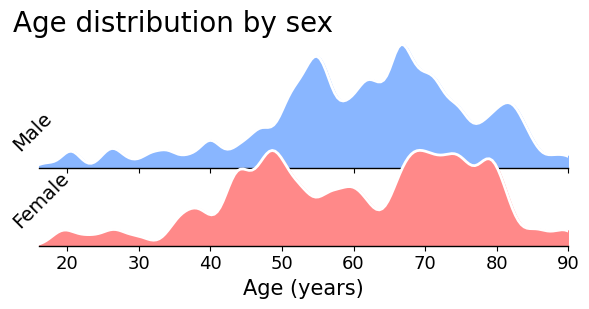

In [10]:
# Age/Sex Ridgeline plot
sex_order = ["Male", "Female"]
g = sns.FacetGrid(df_patient, row="Sex", hue="Sex", aspect=4, height=1.5, palette=["#89b6ff", "#ff8989", "#ffe389"], hue_order=sex_order, row_order=sex_order)
g.map(sns.kdeplot, 'Age', bw_adjust=0.25, clip_on=True, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'Age', bw_adjust=0.25, clip_on=True, fill=False, alpha=1, linewidth=2, color="w")
g.map(plt.axhline, y=0, lw=1, clip_on=False, color='k')
for i, ax in enumerate(g.axes.flat):
    ax.text(12, 0.005, sex_order[i], fontweight='normal', fontsize=14, color=ax.lines[-1].get_color(), rotation=45)
    ax.set_facecolor("none")
    ax.set_ylabel("")
plt.tight_layout()
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.setp(ax.get_xticklabels(), fontsize=13, fontweight='normal')
plt.xlabel('Age (years)', fontweight='normal', fontsize=15)
g.fig.suptitle('Age distribution by sex', x=0.05, ha='left', fontsize=20, fontweight=20)
plt.xlim(16, 90)
plt.savefig("Age x Sex distribution.svg")

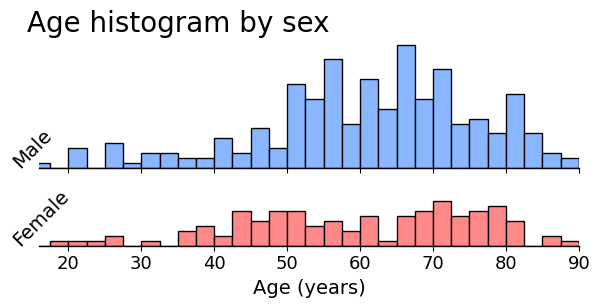

In [11]:
bins = np.arange(10, 100, 2.5)
sex_order = ["Male", "Female"]
g = sns.FacetGrid(df_patient, row="Sex", hue="Sex", aspect=4, height=1.5, palette=["#89b6ff", "#ff8989", "#ffe389"],
                  hue_order=sex_order, row_order=sex_order)
g.map(sns.histplot, 'Age', clip_on=True, fill=True, alpha=1, bins=bins)
g.map(plt.axhline, y=0, lw=1, clip_on=False, color='k')
for i, ax in enumerate(g.axes.flat):
    ax.text(12, 0.005, sex_order[i], fontweight='normal', fontsize=14, color=ax.lines[-1].get_color(), rotation=45)
    ax.set_facecolor("none")
    ax.set_ylabel("")
plt.tight_layout()
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.setp(ax.get_xticklabels(), fontsize=13, fontweight='normal')
plt.xlabel('Age (years)', fontweight='normal', fontsize=14)
g.fig.suptitle('Age histogram by sex', x=0.05, ha='left', fontsize=20, fontweight=20)
plt.xlim(16, 90)
plt.savefig("Age x Sex histogram.svg")

<Figure size 640x480 with 0 Axes>

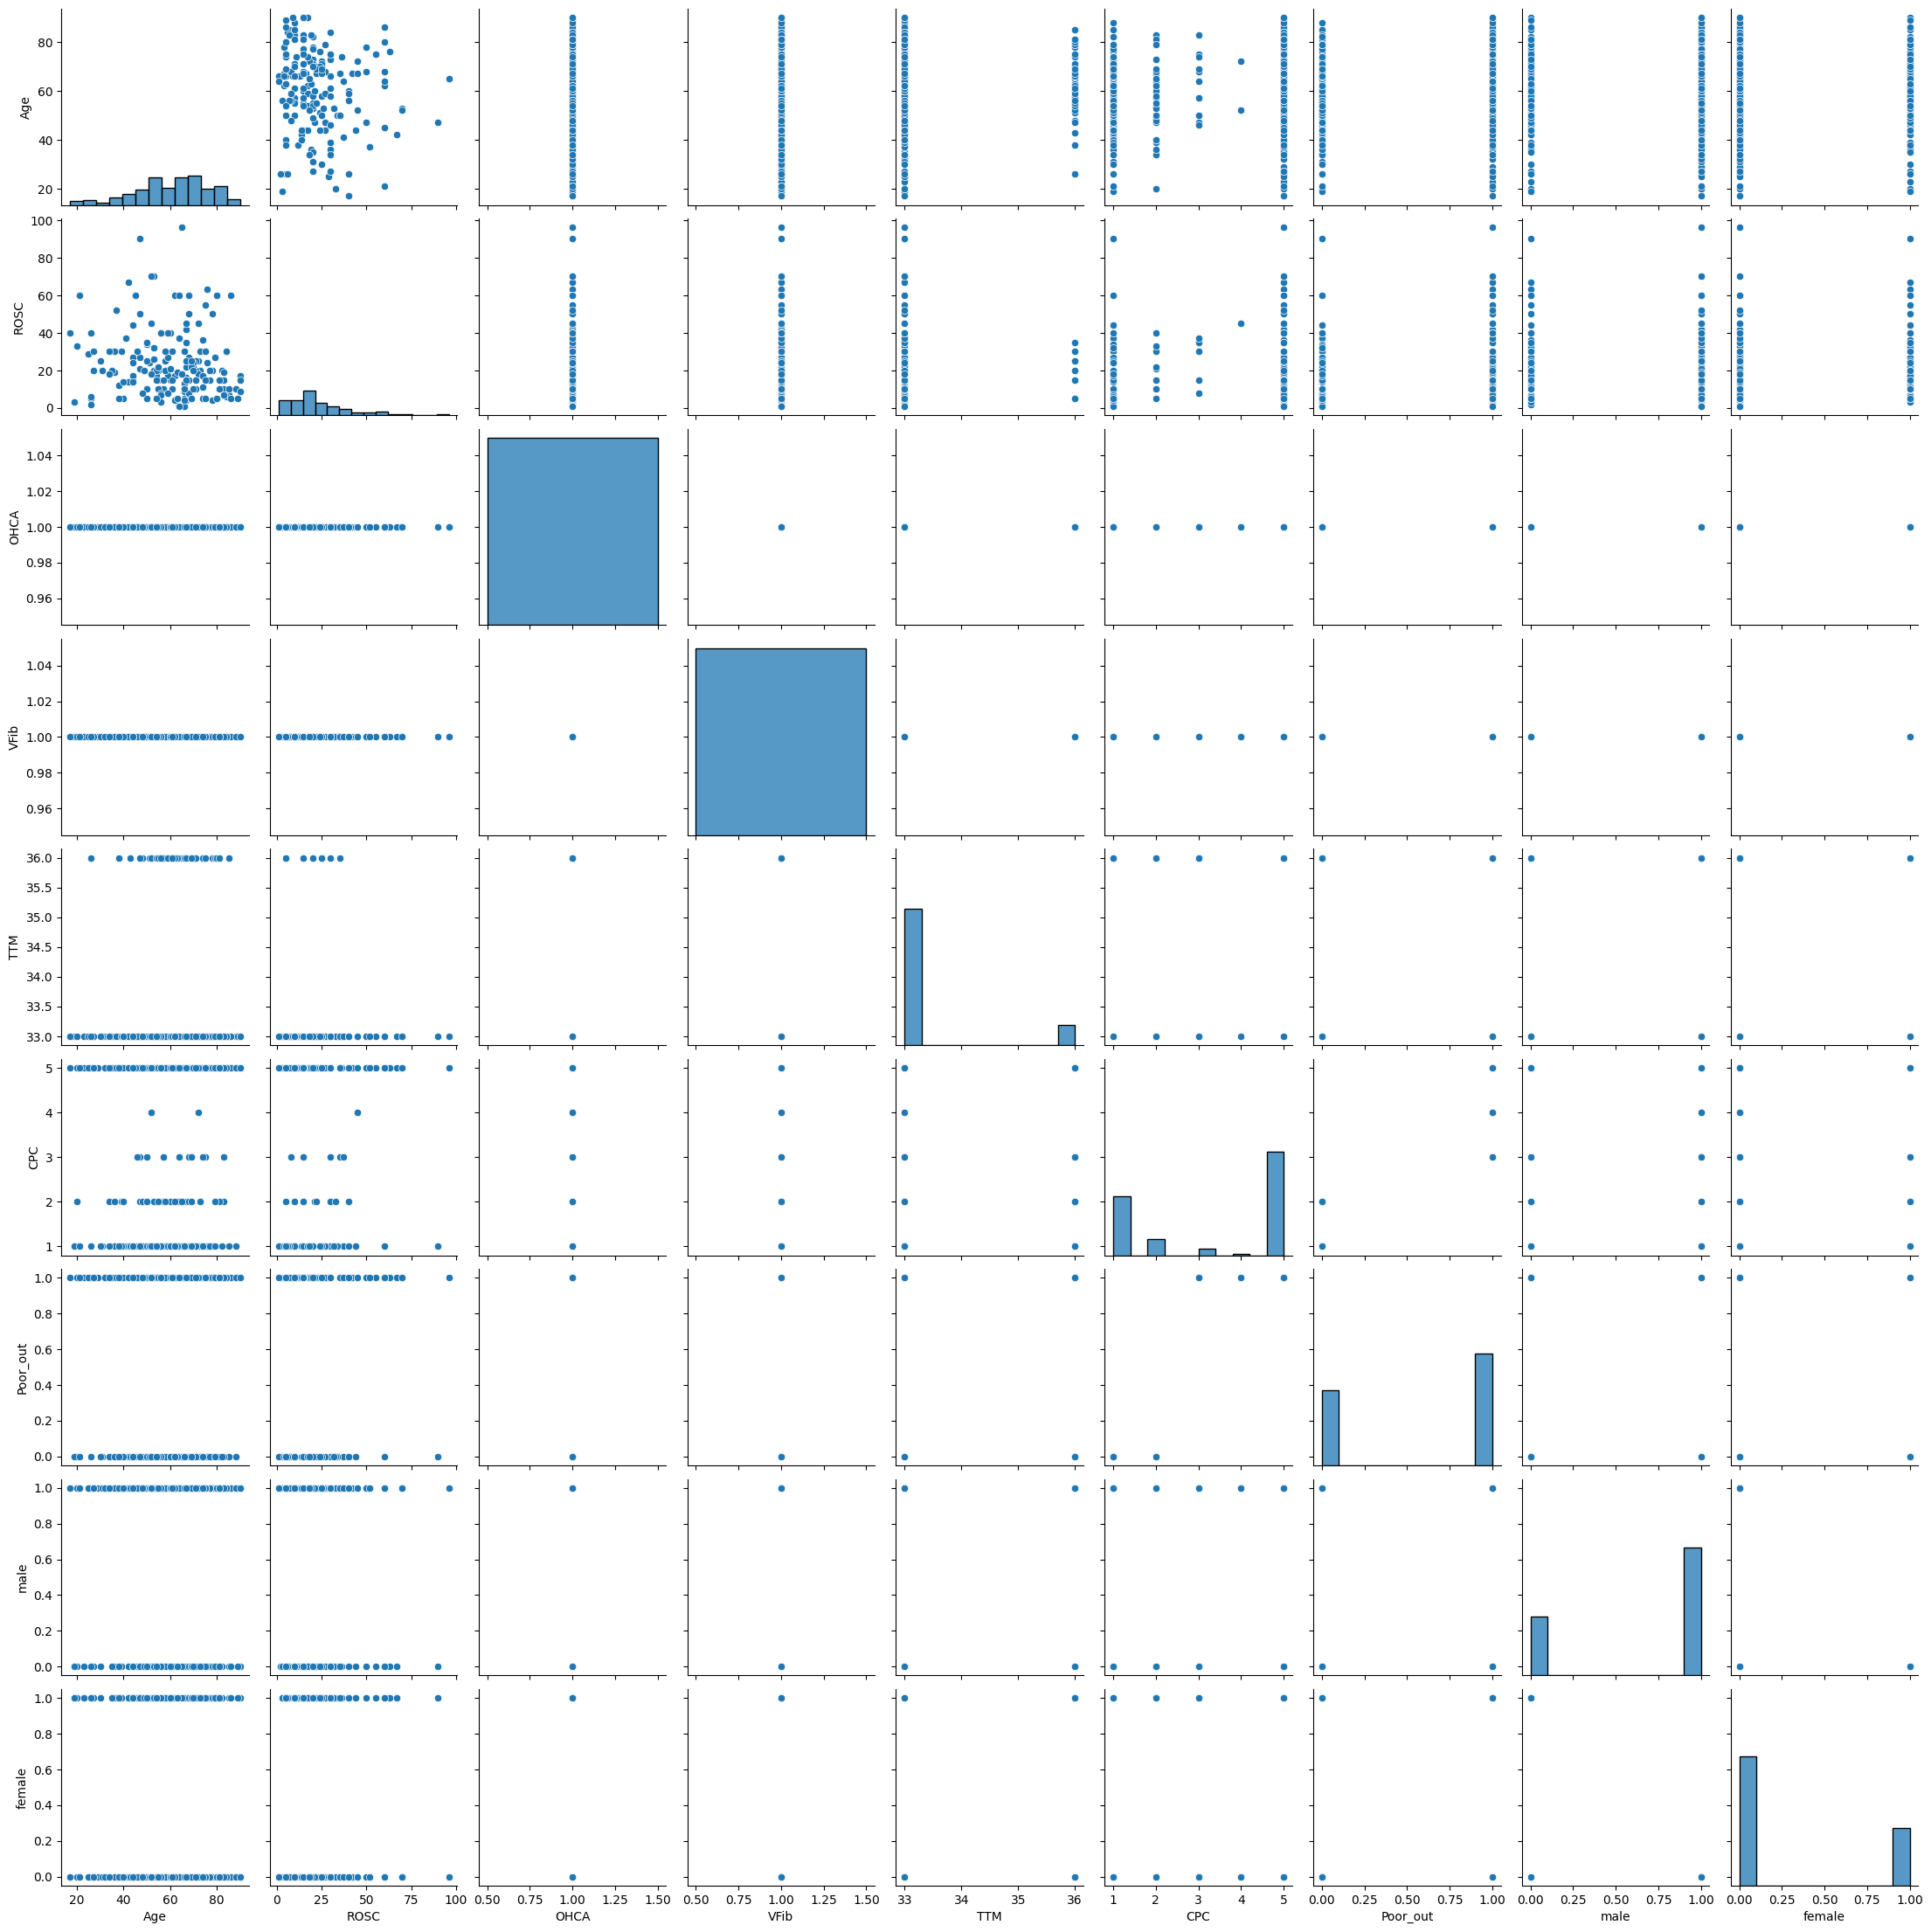

<Figure size 640x480 with 0 Axes>

In [12]:
sns.pairplot(df_patient)
plt.figure()